In [ ]:
from google.colab import files
from IPython.display import Image
from google.colab import drive
drive.mount('/content/drive'

Mounted at /content/drive


In [ ]:
upload=files.upload()

Saving data_6.xlsx to data_6.xlsx
Saving test_6.xlsx to test_6.xlsx
Saving Xgboost_submission.csv to Xgboost_submission.csv


# Prediction of Nitrogen percentage in plants

This work is done in a context of a Kaggle competetion organized by our instructor **Mme.Maryam GUESSOUS** under the module of Analytics Edge for the academic year of 2021/2022.

The team members are :
    **Hajiba MOutia** -
    **Hamza ADDI** -
    **Walid Choukri**


# Context and summary of The dataset

Nitrogen deficiency significantly hinders crop growth. Thus, noticing and solving the problem on time helps in preventing crop losses. It is also useful to know what causes nitrogen deficiency in plants and avoid that correspondingly.

Early problem detection facilitates a successful outcome. Plants with nitrogen deficiency are thin, pale, subject to chlorosis, and produce poor fruits. By knowing how to control nitrogen deficiency in plants with organic and chemical methods, farmers can save yields. Remote sensing assists agriculturalists in identifying the problem early.


The object of this project is to use collected data that was collected by the group **OCP** in order to predict Nitrogen pourcentage in plants and there for use fertilizer in case of deficiency of Nitrogen for the Crop.

        


In [ ]:
Image('pexels-flambo-1112080.jpg')

Output hidden; open in https://colab.research.google.com to view.

This data is divided into two parts :

**Features of the dataset :**

Our data is divided into two parts :

- LAB DATA : Which consisits measurements done by OCP or by the farmer, such as PH, Ec, MO, K20, P2O5 and the sampling dates, etc.

- Satellite DATA : Which consists of Satellite images of Crop farms, the images are gathered by several satteiltes.

### Summary of the notebook

We will treat this dataset as follows :
 
 * Importing required libraries
 * Data pre-processing/Data Inspection/Features Engineering
 * Modelling
 * Model Improvment
 * Final model for submissions
 




* Final Leaderboard results **( fourth/ fifth place )** :


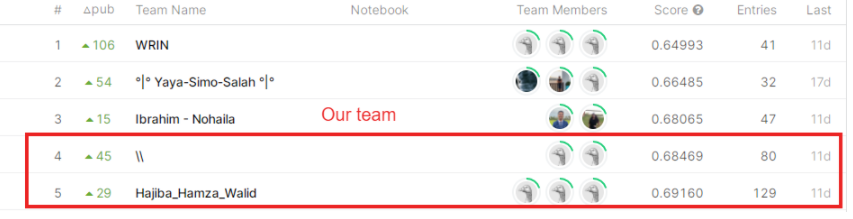

In [ ]:
Image('LEADERBOARD.PNG')

# 1)- Import required libraries
The first thing we are going to do is importing most used libraries for Maching Learning projects such as `pandas` for data manipulation,`numpy` For Numerical imports finally `matplotlib` and `seaborn` for data visualisation.
By the progress of this project, we are going to import other libraries for modelling such as `sklearn`

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

Now that we imported the libraries we need, we can get started by importing our data using the built in function `read_csv` of the package `pandas`

In [ ]:

data=pd.read_excel('data_6.xlsx')
dataT=pd.read_excel('test_6.xlsx')
datasub=dataT


Now let's inspect our data

In [ ]:
data.shape

(2096, 110)

In [ ]:
dataT.shape

(238, 109)

In [ ]:
data.head()

,id,Province,Agroecological.zones,Crop,Grp.Crop,Regime,Code_Stage,birth.day,sampling.date,Base.Feed,...,NDVI_oct_mars,NDVIsum,P_dec_fev,P_oct_mars,P_sep_nov,pH,Ec,MO,K20,P2O5
0,1,EL YOUSSOUFIA,défavorable,Orge,Barley,Bour,S1,2020-12-15,2021-02-10,Yes,...,0.36,4.14,48.08,212.35,145.85,10.2,0.4,4.1,529.0,155.4
1,2,EL YOUSSOUFIA,défavorable,Blé dur,Wheat,Bour,S1,2020-12-01,2021-02-10,No,...,0.22,2.51,37.99,206.52,161.54,10.0,0.3,3.0,172.5,57.6
2,3,EL YOUSSOUFIA,défavorable,Blé tendre,Wheat,Bour,S1,2020-12-20,2021-02-10,No,...,0.36,4.51,48.08,212.35,145.85,10.0,0.3,2.4,190.9,51.3
3,4,EL YOUSSOUFIA,défavorable,Orge,Barley,Bour,S1,2020-12-15,2021-02-10,Yes,...,0.33,4.09,48.08,212.35,145.85,10.1,0.2,2.3,361.1,57.2
4,6,El Jadida,interemédiaire,Orge,Barley,Bour,S1,2020-11-20,2021-01-27,No,...,0.68,6.78,80.18,279.22,175.48,9.8,0.3,0.9,268.1,137.8


Our training Data contains **2096** samples, on the other hand the testing data consists only of **238** samples.

Our data consists of **109** independant features with our dependant feature being the column named **Target** which consists as explained above of the percentage of Nitrogen in the plant with is a `continuous` variable and which is also the quantity we are trying to predict.


In [ ]:
data.columns.values

array(['id', 'Province', 'Agroecological.zones', 'Crop', 'Grp.Crop',
       'Regime', 'Code_Stage', 'birth.day', 'sampling.date', 'Base.Feed',
       'Second.feed.1', 'second.feed.1.date', 'second.feed..2',
       'second.feed..2.date', 'Sampling.Timing.Vs.second.feed.timing',
       'Target', 'Mos.', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'IND1', 'IND2', 'IND3', 'IND4',
       'IND5', 'IND6', 'IND7', 'IND8', 'IND9', 'B1', 'B2', 'B3', 'B4',
       'B5', 'B6', 'B6_VCID_1', 'B6_VCID_2', 'B7', 'FVC', 'LST', 'NDVI',
       'AI', 'ETP_jan_mars', 'ETP_oct_dec', 'ETP_oct_mars', 'EVI_Diff',
       'EVI_RUE', 'EVI_fev', 'EVI_jan', 'EVI_jan_mars', 'EVI_mars',
       'EVI_max', 'EVI_min', 'EVI_oct_dec', 'EVI_oct_mars', 'EVIsum',
       'FAPAR_RUE', 'FAPAR_jan_mars', 'FAPAR_oct_dec', 'FAPAR_oct_mars',
       'FAPARsum', 'Fpar_Diff', 'Fpar_fev', 'Fpar_jan', 'Fpar_mars',
       'Fpar_max', 'Fpar_min', 'LAI_Diff', 'LAI_fev', 'LAI_jan',
       'LAI_jan

In [ ]:
data.describe(include="all")

<ipython-input-8-959e96f52f7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")
<ipython-input-8-959e96f52f7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")
<ipython-input-8-959e96f52f7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all")
<ipython-input-8-959e96f52f7b>:1: FutureWarning: Treating dateti

,id,Province,Agroecological.zones,Crop,Grp.Crop,Regime,Code_Stage,birth.day,sampling.date,Base.Feed,...,NDVI_oct_mars,NDVIsum,P_dec_fev,P_oct_mars,P_sep_nov,pH,Ec,MO,K20,P2O5
count,2096.000000,2096,2096,2096,2096,978,2096,1801,2096,2096,...,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,898.000000,896.000000,898.000000,898.000000,898.000000
unique,NaN,43,5,14,2,4,2,147,121,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Khémisset,interemédiaire,Blé tendre,Wheat,Bour,S2,2019-11-15 00:00:00,2020-02-11 00:00:00,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,166,654,898,1472,860,1166,94,120,1600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-15 00:00:00,2020-01-10 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-11 00:00:00,2021-05-03 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1167.260019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.567244,5.985209,129.767470,339.895228,167.701267,9.480290,0.261161,2.836637,357.404232,79.112361
std,673.130605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.155919,1.413040,42.586322,106.652727,87.651791,0.618501,0.321151,1.259304,253.441070,117.404436
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.080000,-0.090000,30.160000,126.540000,27.680000,6.600000,0.000000,0.300000,6.800000,5.800000
25%,586.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.465000,5.150000,102.315000,267.595000,95.790000,9.200000,0.200000,2.000000,204.100000,26.700000


In [ ]:
data.dtypes

id                        int64
Province                 object
Agroecological.zones     object
Crop                     object
Grp.Crop                 object
                         ...   
pH                      float64
Ec                      float64
MO                      float64
K20                     float64
P2O5                    float64
Length: 110, dtype: object

As we can observe, We have **float** variables and **object** variables.
But with a large amount of missing data

At this point, as our features is well read we are going to drop the `id` as well as non useful features from our data which containt so many missing vaules such as **Regime**

In [ ]:
# Removing non useful features from training and testing set
data = data.drop(columns=['id','Regime'])
dataT= dataT.drop(columns=['id','Regime'])

#  exploratory data analysis/Data pre-processing/Data Inspection/Features Engineering

And because we have some datetime columns such as `sampling.date`, `second.feed.1.date`, `second.feed..2.date` and `birth.day`  which do not containts so many missing values we are going to exploit the use of **Feature engieering** by adding new columns such as `"day of week"` and `"day of year"` with the year of tall the columns and it's because of the seasonality of these processes.

In [ ]:
 
data['sampling.date'] = pd.to_datetime(data['sampling.date'],format='%Y%m%d')
data['yearsampling.date'] = pd.DatetimeIndex(data['sampling.date']).year
data['monthsampling.date'] = pd.DatetimeIndex(data['sampling.date']).month
data['dayofweeksampling.date'] = pd.DatetimeIndex(data['sampling.date']).weekday
data['dayofyearsampling.date'] = pd.DatetimeIndex(data['sampling.date']).dayofyear
dataT['sampling.date'] = pd.to_datetime(dataT['sampling.date'],format='%Y%m%d')

dataT['yearsampling.date'] = pd.DatetimeIndex(dataT['sampling.date']).year
dataT['monthsampling.date'] = pd.DatetimeIndex(dataT['sampling.date']).month
dataT['dayofweeksampling.date'] = pd.DatetimeIndex(dataT['sampling.date']).weekday
dataT['dayofyearsampling.date'] = pd.DatetimeIndex(dataT['sampling.date']).dayofyear

data['second.feed.1.date'] = pd.to_datetime(data['second.feed.1.date'],format='%Y%m%d')
data['yearsecond.feed.1.date'] = pd.DatetimeIndex(data['second.feed.1.date']).year
data['monthsecond.feed.1.date'] = pd.DatetimeIndex(data['second.feed.1.date']).month
data['dayofweeksecond.feed.1.date'] = pd.DatetimeIndex(data['second.feed.1.date']).weekday
data['dayofyearsecond.feed.1.date'] = pd.DatetimeIndex(data['second.feed.1.date']).dayofyear
dataT['second.feed.1.date'] = pd.to_datetime(dataT['second.feed.1.date'],format='%Y%m%d')

dataT['yearsecond.feed.1.date'] = pd.DatetimeIndex(dataT['second.feed.1.date']).year
dataT['monthsecond.feed.1.date'] = pd.DatetimeIndex(dataT['second.feed.1.date']).month
dataT['dayofweeksecond.feed.1.date'] = pd.DatetimeIndex(dataT['second.feed.1.date']).weekday
dataT['dayofyearsecond.feed.1.date'] = pd.DatetimeIndex(dataT['second.feed.1.date']).dayofyear

data['second.feed..2.date'] = pd.to_datetime(data['second.feed..2.date'],format='%Y%m%d')
data['yearsecond.feed..2.date'] = pd.DatetimeIndex(data['second.feed..2.date']).year
data['monthsecond.feed..2.date'] = pd.DatetimeIndex(data['second.feed..2.date']).month
data['dayofweeksecond.feed..2.date'] = pd.DatetimeIndex(data['second.feed..2.date']).weekday
data['dayofyearsecond.feed..2.date'] = pd.DatetimeIndex(data['second.feed..2.date']).dayofyear

dataT['second.feed..2.date'] = pd.to_datetime(dataT['second.feed..2.date'],format='%Y%m%d')
dataT['yearsecond.feed..2.date'] = pd.DatetimeIndex(dataT['second.feed..2.date']).year
dataT['monthsecond.feed..2.date'] = pd.DatetimeIndex(dataT['second.feed..2.date']).month
dataT['dayofweeksecond.feed..2.date'] = pd.DatetimeIndex(dataT['second.feed..2.date']).weekday
dataT['dayofyearsecond.feed..2.date'] = pd.DatetimeIndex(dataT['second.feed..2.date']).dayofyear

dataT['birth.day'] = pd.to_datetime(dataT['birth.day'],format='%Y%m%d')
dataT['yearbirth.day'] = pd.DatetimeIndex(dataT['birth.day']).year
dataT['monthbirth.day'] = pd.DatetimeIndex(dataT['birth.day']).month
dataT['dayofweekbirth.day'] = pd.DatetimeIndex(dataT['birth.day']).weekday
dataT['dayofyearbirth.day'] = pd.DatetimeIndex(dataT['birth.day']).dayofyear

data['birth.day'] = pd.to_datetime(data['birth.day'],format='%Y%m%d')
data['yearbirth.day'] = pd.DatetimeIndex(data['birth.day']).year
data['monthbirth.day'] = pd.DatetimeIndex(data['birth.day']).month
data['dayofweekbirth.day'] = pd.DatetimeIndex(data['birth.day']).weekday
data['dayofyearbirth.day'] = pd.DatetimeIndex(data['birth.day']).dayofyear

After creating our new columns, now we can dropthe inital datetime columns

In [ ]:
data = data.drop(columns=["birth.day","second.feed.1.date","sampling.date","second.feed..2.date"])
dataT = dataT.drop(columns=["birth.day","second.feed.1.date","sampling.date","second.feed..2.date"])

Back again into Data Processing, many categorical columns are not well written in the same form, for example we can find in the column `Grp.Crop` two diffrents values **Barley** and **barley** which they must be equal, so we are going to lowercase everything and remove spaces in all categorical variables.

Before we have :

In [ ]:
data['Crop'].unique()

array(['Orge', 'Blé dur', 'Blé tendre', 'ORGE ', 'ORGE', 'orge ', 'orge',
       'Avoine', 'Orge ', 'Blé Tendre', 'Blé dur ', 'blé tendre',
       'Blé tendre ', 'blé tendre '], dtype=object)

In [ ]:
cat_cols = ['Grp.Crop','Crop', 'Agroecological.zones', 'Province',"Code_Stage",'Base.Feed','Second.feed.1',  'second.feed..2', 'Sampling.Timing.Vs.second.feed.timing']
for i in cat_cols:
    data[i]=data[i].str.lower()
    dataT[i]=dataT[i].str.lower()
    data[i]=data[i].str.strip()
    dataT[i]=dataT[i].str.strip() 

In [ ]:
data["Crop"].unique()

array(['orge', 'blé dur', 'blé tendre', 'avoine'], dtype=object)

Now we are sure that our categorical data is unique. 

**Visualising Categorical features**

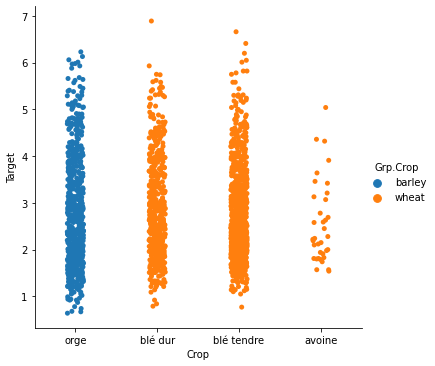

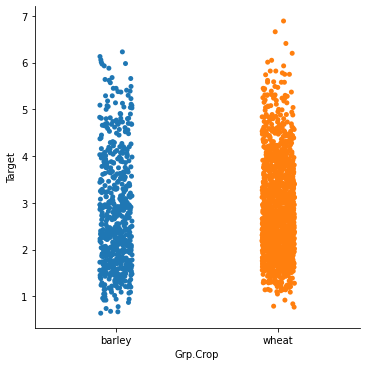

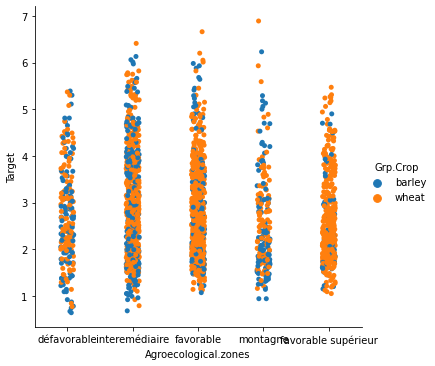

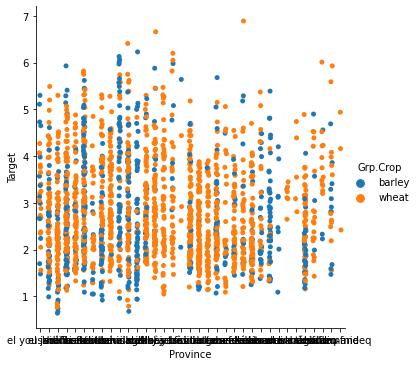

In [ ]:
sns.catplot(x="Crop", hue="Grp.Crop", y="Target", data=data)
sns.catplot(x="Grp.Crop", y="Target", data=data)
sns.catplot(x="Agroecological.zones", hue="Grp.Crop",y="Target", data=data)
sns.catplot(x="Province", hue="Grp.Crop",y="Target", data=data)


We can observe that **barley** and  **wheat** are distributed well distributed with respect to `Agrecologial.zones` which is expected. On the other hand **wheat** is more produced compared to **barely** in some provinces compared to others due to the high demand on **wheat**.

now that our `categorical variables` are uniques, we are going to **encode** these ones into `numerical data`, so we can be able to predict missing ones later using **KKN imputer** for example.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# create a list of categorical columns to iterate over

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode data
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

for columns in cat_cols:
    encode(data[columns])
    encode(dataT[columns])

C:\Users\pc\naconda\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pc\naconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
colobject=[]
for col in dataT.columns:
    if dataT[col].dtypes=="object":
        colobject.append(col)
print(colobject)

[]


In [ ]:
data.isnull().sum().sort_values(ascending=False).head(10)

yearsecond.feed..2.date         2080
dayofyearsecond.feed..2.date    2080
dayofweeksecond.feed..2.date    2080
monthsecond.feed..2.date        2080
Ec                              1200
K20                             1198
P2O5                            1198
pH                              1198
MO                              1198
dayofyearsecond.feed.1.date      864
dtype: int64

In [ ]:
dataT.isnull().sum().sort_values(ascending=False).head(10)

yearsecond.feed..2.date         234
dayofyearsecond.feed..2.date    234
dayofweeksecond.feed..2.date    234
monthsecond.feed..2.date        234
Ec                              140
MO                              140
K20                             140
P2O5                            140
pH                              140
dayofyearsecond.feed.1.date      97
dtype: int64

And because the data in front of us contains a large amount of **missing values**, we are going to set a bar of how much missing data allowed, which is **70%** in our case.

In [ ]:
todropfromtrain=[]
todropfromtest=[]
for x in data.columns:
    if data[x].isnull().sum()/data[x].count()>0.7 :
        todropfromtrain.append(x)
for x in dataT.columns:
    if dataT[x].isnull().sum()/dataT[x].count()>0.7:
        todropfromtest.append(x)


In [ ]:
for i in todropfromtest:
    if i not in todropfromtrain:
        print(i)

print(len(todropfromtrain))
print(len(todropfromtest))
todropfromtrain

data=data.drop(columns=todropfromtest)
dataT=dataT.drop(columns=todropfromtest)

13
9


# Dealing with outliers

In order to deal with outliers in our dataset, we tried detecting them on our training dataset using the Turkey method which tells us that our data must be distributed between two bounds.
* Min =(Q1 - 1.5 * IQR)
* Max= (Q3 + 1.5 * IQR)

with `IQR = Q3 -Q1`


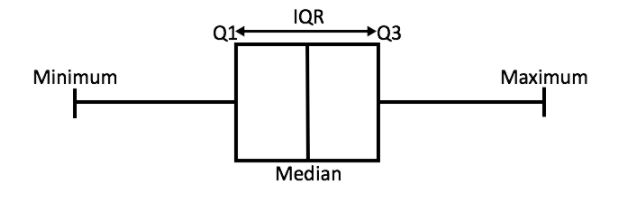

In [ ]:
Image("IQR.PNG")


 * <a href="https://panmath7.files.wordpress.com/2017/04/how_to_find_iqr_boxplot_image.jpg">Source</a>
 
 After detecting the outliers we drop them those samples on our training set.
 
 For example the feature **NDVIsum**, **X1** and **X7** consists of a large amount of outliers as observed in the figure bellow.

C:\Users\pc\naconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X1'>

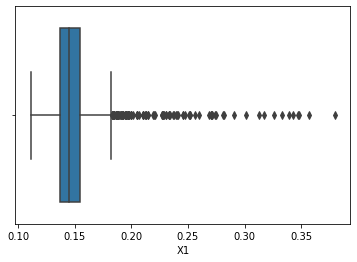

In [ ]:
sns.boxplot(data['X1'])

C:\Users\pc\naconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X7'>

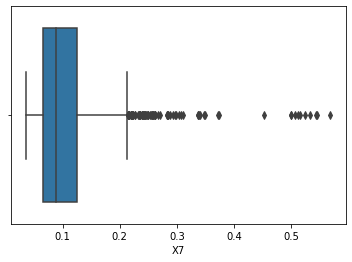

In [ ]:
sns.boxplot(data['X7'])

C:\Users\pc\naconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NDVIsum'>

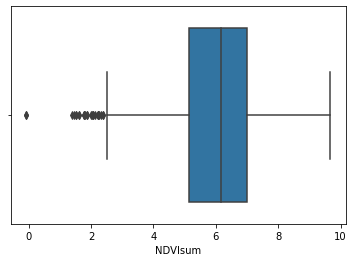

In [ ]:
sns.boxplot(data['NDVIsum'])

In [ ]:
def find_outliers_turkey(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr=q3-q1
    floor=q1-1.5*iqr
    ceilling=q3+1.5*iqr
    outlier_indices=list(x.index[(x<floor)|(x>ceilling)])
    outlier_values=list(x[outlier_indices])
    return (outlier_indices, outlier_values)
turkey={}
turkeyindex={}
for x in data.columns:
    if data[x].dtypes=="float":

        turkey[x]=find_outliers_turkey(data[x])[1]
        turkeyindex[x]=find_outliers_turkey(data[x])[0]
turkeyT={}
turkeyTindex={}
for x in dataT.columns:
    if dataT[x].dtypes=="float":
        turkeyT[x]=find_outliers_turkey(dataT[x])[1]
        turkeyTindex[x]=find_outliers_turkey(dataT[x])[0]
new_tur={}
newturkeyindex={}
for  i in turkey.keys():
    if turkey[i]!=[]:
        new_tur[i]=turkey[i]
        newturkeyindex[i]=turkeyindex[i]
turkeyindex=newturkeyindex
turkey=new_tur
new_turT={}
newturkeyTindex={}
for  i in turkeyT.keys():
    if turkeyT[i]!=[]:
        new_turT[i]=turkeyT[i]
        newturkeyTindex[i]=turkeyTindex[i]
turkeyTindex=newturkeyTindex
turkeyT=new_turT
newturkeyindex
k=[]
for i in newturkeyindex.values():
    for j in i:
        k.append(j)
turkeyindex=k

In [ ]:
data.drop(turkeyindex,axis=0,inplace=True)

At this point, we inspect the missing data in our dataset.

In [ ]:
data.isna().sum()

Province                         0
Agroecological.zones             0
Crop                             0
Grp.Crop                         0
Code_Stage                       0
                              ... 
dayofyearsecond.feed.1.date    851
yearbirth.day                  290
monthbirth.day                 290
dayofweekbirth.day             290
dayofyearbirth.day             290
Length: 111, dtype: int64

We use the `KNNImputer` from the `sklearn` package in order to remplace the missing data with parameter `n_neighbors=20` and other parameters which were the convinient parameter for our dataset.

In [ ]:
!pip install --upgrade sklearn

You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:

from sklearn.impute import KNNImputer

imputer = KNNImputer( n_neighbors=20, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False)
data= pd.DataFrame(imputer.fit_transform(data),columns = data.columns)


imputer = KNNImputer( n_neighbors=20, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False)
dataT= pd.DataFrame(imputer.fit_transform(dataT),columns = dataT.columns)

data.head()

,Province,Agroecological.zones,Crop,Grp.Crop,Code_Stage,Base.Feed,Second.feed.1,second.feed..2,Sampling.Timing.Vs.second.feed.timing,Target,...,dayofweeksampling.date,dayofyearsampling.date,yearsecond.feed.1.date,monthsecond.feed.1.date,dayofweeksecond.feed.1.date,dayofyearsecond.feed.1.date,yearbirth.day,monthbirth.day,dayofweekbirth.day,dayofyearbirth.day
0,9.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,5.11,...,2.0,41.0,2021.0,1.00,0.00,25.00,2020.0,12.0,1.0,350.0
1,9.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.81,...,2.0,41.0,2020.8,1.85,2.50,40.80,2020.0,12.0,1.0,336.0
2,9.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,4.06,...,2.0,41.0,2020.5,2.25,2.70,51.70,2020.0,12.0,6.0,355.0
3,9.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,5.30,...,2.0,41.0,2021.0,1.00,2.00,20.00,2020.0,12.0,1.0,350.0
4,8.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,3.62,...,2.0,27.0,2020.9,2.05,2.95,42.85,2020.0,11.0,4.0,325.0


We can see now that we ended with no missing samples, values in our data.

In [ ]:
data.isna().sum()

Province                       0
Agroecological.zones           0
Crop                           0
Grp.Crop                       0
Code_Stage                     0
                              ..
dayofyearsecond.feed.1.date    0
yearbirth.day                  0
monthbirth.day                 0
dayofweekbirth.day             0
dayofyearbirth.day             0
Length: 111, dtype: int64

# Correlation

At this point, let's inspect our Correlation matrix in order to deal with multicolinearity and high correlations issues

<AxesSubplot:>

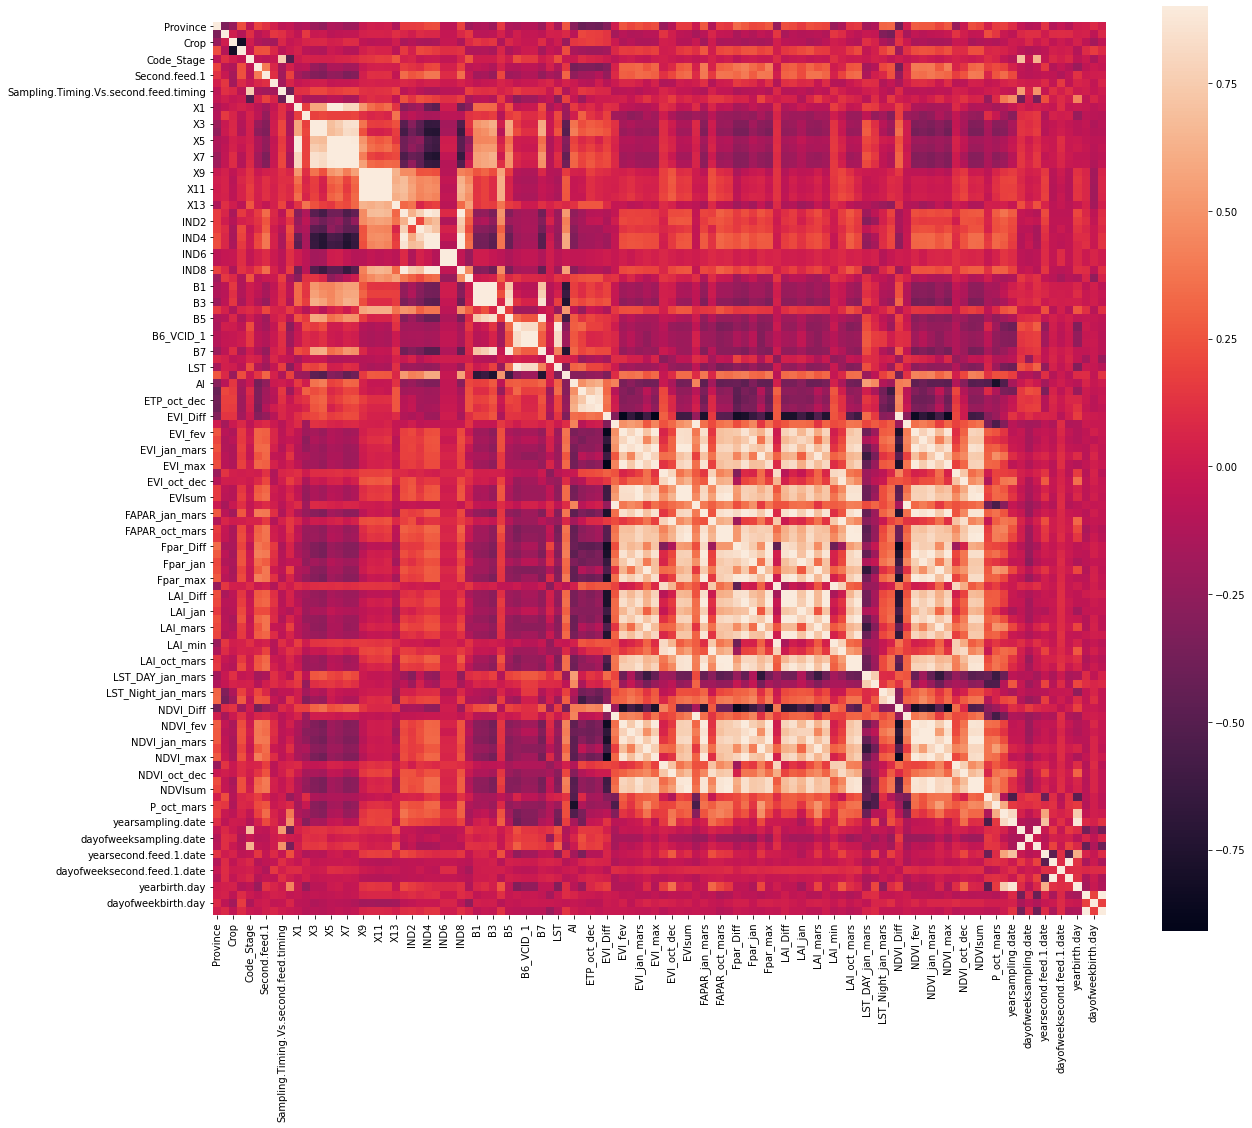

In [ ]:
corrmat = dataT.corr()
plt.subplots(figsize=(20,17))
sns.heatmap(corrmat, vmax=0.9, square=True)

As we can crealry observe many variables represents high correlations with our Target variable, we also notice high correlation between variables, we will delete collumns with high correlations by setting  **90%** of correlation as the maximum bar

In [ ]:
cor_matrix = pd.DataFrame(data).corr().abs()
print(cor_matrix)

                             Province  Agroecological.zones      Crop  \
Province                     1.000000              0.329331  0.114613   
Agroecological.zones         0.329331              1.000000  0.020767   
Crop                         0.114613              0.020767  1.000000   
Grp.Crop                     0.167200              0.073576  0.815562   
Code_Stage                   0.023214              0.050257  0.021465   
...                               ...                   ...       ...   
dayofyearsecond.feed.1.date  0.020400              0.047358  0.020645   
yearbirth.day                0.018251              0.061228  0.074442   
monthbirth.day               0.064823              0.057211  0.038530   
dayofweekbirth.day           0.008270              0.038586  0.031147   
dayofyearbirth.day           0.059857              0.045033  0.036328   

                             Grp.Crop  Code_Stage  Base.Feed  Second.feed.1  \
Province                     0.167200    0.0

In [ ]:
correlated_features = set()
correlation_matrix = data.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
data = data.drop(columns=correlated_features)
dataT = dataT.drop(columns=correlated_features)

In [ ]:
data.shape

(2071, 62)

# polynomial features

In order to improve our score, and for  further advanced features engineering, we generated polynomial features using `PolynomialFeatures` from tha package `sklearn` with a parameter of `3`which means that we add the power of 2 and 
3 of all columns to our features.

For example :

Instead of only having a colulmn **X1** we add two other columns

* **X1^2** 
* **X1^3**


But before, let's create two vectors, one contais our **Target** variable and the other one containts our **independant variables**

In [ ]:
y=data['Target']
x = data.drop(columns=['Target'])
xtest=dataT

Let's now use the **PolynomialFeatures** transformation

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(2)
trans.fit_transform(x)
trans.fit_transform(xtest)


array([[  1.,   9.,   0., ..., 144.,  72.,  36.],
       [  1.,  22.,   0., ..., 121.,  44.,  16.],
       [  1.,  22.,   0., ..., 121.,   0.,   0.],
       ...,
       [  1.,   3.,   3., ..., 144.,  12.,   1.],
       [  1.,  24.,   3., ..., 144.,  72.,  36.],
       [  1.,  24.,   3., ..., 144.,  72.,  36.]])

Now, that we are r eady, let's split our data into **training** and **testing** set using `train_test_split` from `sklearn` package.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test, = train_test_split(x, y, test_size=0.2, random_state=70)

Make sure our testing set and training set have the same columns

In [ ]:
xtest=xtest[x.columns.values]

# Using Machine Learning Models

Now that our data is ready to be trained and to be predicted, we are going to use some powerful regression models some are based on boosting, some other models are based on bagging, in the course of what is going to occur, we are going to be using the follow algorithms :
* Linear Regression
* RandomForest
* XGBoost
* CatBoost
* LightGBM

Importing models and **mean_squared_error** from `sklearn` since we are trying to minimise that quantity :

In [ ]:

!pip install optuna
!pip install ray
!pip install catboost
!pip install xgboost
!pip install lightgbm


  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=55453676c95c9952f3787ebc2f2608681152486998e551c5e0f8599316104e56
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost.sklearn import XGBRegressor

from sklearn import preprocessing
import ray
from ray import tune
from ray.tune.suggest import ConcurrencyLimiter
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.optuna import OptunaSearch
from ray.tune.logger import DEFAULT_LOGGERS
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

from catboost import Pool, CatBoostRegressor
import optuna
from math import sqrt
import datetime

**Linear Regression**

In [ ]:
#Let's build our Linear Regressor
regressor = LinearRegression() 
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
Y_trainpred=regressor.predict(X_train)

Using a simple Model such as `Linear Regression`, we got the following results on our splitted data

In [ ]:

print("MSE on testing set :", MSE(Y_test,Y_pred))
print("MSE on training set :", MSE(Y_train,Y_trainpred))

MSE on testing set : 0.5691640242674391
MSE on training set : 0.5439054112377124


In [ ]:

rmse = sqrt(MSE(Y_test, Y_pred))
print("RMSE on testing set:",rmse)

RMSE on testing set: 0.7544296019294571


**RandomForest**

At this point, let's find the parameters that minimize the most the **mean squared error** using Randomized search,

But at first, let's define the parameters we are going to tune.

In [ ]:
forest=RandomForestRegressor()
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


Now let's fit our Randomized search model:

In [ ]:
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Now that our model is trained, let's see the best parameters

In [ ]:
print("Random forest best parameters :",rf_random.best_estimator_)

Random forest best parameters : RandomForestRegressor(max_depth=45, min_samples_split=10, n_estimators=155)


In [ ]:
model=RandomForestRegressor(max_depth=45, min_samples_split=10, n_estimators=155)

In [ ]:

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_trainpred=model.predict(X_train)

In [ ]:
print("MSE on testing set :", MSE(Y_test,Y_pred))
print("MSE on training set :", MSE(Y_train,Y_trainpred))

rmse = sqrt(MSE(Y_test, Y_pred))
print("RMSE on testing set:",rmse)

MSE on testing set : 0.5358068917109421
MSE on training set : 0.13403374295243448
RMSE on testing set: 0.7319883139169245


Let's compare the predicted data to the actual data

In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(15)
df1

,Actual,Predicted
995,2.71,3.213388
558,1.29,1.647651
505,1.52,1.963938
1032,1.57,2.157515
500,0.64,1.329929
1270,1.94,2.055228
1533,1.74,2.406800
1630,2.39,3.072779
1595,3.99,3.196238
1729,1.87,2.146881


* Predictions for submissions :

In [ ]:
model.fit(x, y)
y_pred = model.predict(xtest)

In [ ]:
submission = pd.DataFrame({'Id':datasub['id'],'Target':y_pred})
#Visualize the first 5 rows
submission.head()
submission.to_csv('randomforest_submission.csv' , index=False)

**LightGBM**

Now let's use a more performant model as **LightGBM** which is based on boosting

In [ ]:
model = lgb.LGBMRegressor(objective='regression',n_estimators=2162, max_depth= 4, subsample=0.65, 
                     colsample_bytree= 0.48, learning_rate= 0.01)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_trainpred=model.predict(X_train)

In [ ]:
print("MSE on testing set :", MSE(Y_test,Y_pred))
print("MSE on training set :", MSE(Y_train,Y_trainpred))

rmse = sqrt(MSE(Y_test, Y_pred))
print("RMSE on testing set:",rmse)

MSE on testing set : 0.48883182892057137
MSE on training set : 0.1358587081555487
RMSE on testing set: 0.6991650941806029


Let's compare the predicted data to the actual data

In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(15)
df1

,Actual,Predicted
995,2.71,3.435205
558,1.29,1.621449
505,1.52,2.115955
1032,1.57,2.180423
500,0.64,1.456059
1270,1.94,1.998846
1533,1.74,2.336002
1630,2.39,3.175944
1595,3.99,3.075335
1729,1.87,2.252039


* Predictions for submissions :

In [ ]:
model.fit(x, y)

LGBMRegressor(colsample_bytree=0.48, learning_rate=0.01, max_depth=4,
              n_estimators=2162, objective='regression', subsample=0.65)

In [ ]:
y_pred = model.predict(xtest)

In [ ]:
submission = pd.DataFrame({'Id':datasub['id'],'Target':y_pred})
#Visualize the first 5 rows
submission.head()
submission.to_csv('Lightgbm_submission.csv' , index=False)

**XGBOOST**

In [ ]:
xgb = XGBRegressor()

At this point, let's find the parameters that minimize the most the **mean squared error** using Optuna Search,

But at first, let's define the parameters we are going to tune.

In [ ]:
xgb_tune_kwargs = {
    "n_estimators": tune.loguniform(100, 5000),
    "max_depth": tune.randint(0, 5),
    # max_leaves doesn't seem to have any impact on XGBoost but num_leaves does help LGBM, oddly.
    # 'max_leaves': tune.loguniform(1, 1000),    
    "subsample": tune.quniform(0.25, 0.75, 0.01),
    "colsample_bytree": tune.quniform(0.05, 0.5, 0.01),
    "colsample_bylevel": tune.quniform(0.05, 0.5, 0.01),    
    "learning_rate": tune.quniform(-3.0, -1.0, 0.5),
#     "wandb": {
#         "project": "iowa_xgb",
#         "api_key_file": "~/secrets/wandb.txt",
#    }    
}

xgb_tune_params = [k for k in xgb_tune_kwargs.keys() if k != 'wandb']
xgb_tune_params

['n_estimators',
 'max_depth',
 'subsample',
 'colsample_bytree',
 'colsample_bylevel',
 'learning_rate']

With this function we find the best parameters for our **model**.

In [ ]:
# @wandb_mixin
def my_xgb(config):
    
    # fix these configs to match calling convention
    # search wants to pass in floats but xgb wants ints
    #config['max_leaves'] = int(config['max_leaves'])
    config['n_estimators'] = int(config['n_estimators'])   # pass float eg loguniform distribution, use int
    # hyperopt needs left to start at 0 but we want to start at 2    
    config['max_depth'] = int(config['max_depth']) + 2
    config['learning_rate'] = 10 ** config['learning_rate']
    
    xgb = XGBRegressor(
        objective='reg:squarederror',
        n_jobs=1,
        booster='gbtree',   
        scale_pos_weight=1, 
        **config,
    )
    scores = -cross_val_score(xgb,x, y,
                                      scoring="neg_root_mean_squared_error",
                                      cv=4)
    rmse = np.mean(scores)
    tune.report(rmse=rmse)
#     wandb.log({"rmse": rmse})

    return {"rmse": rmse}

In [ ]:
NUM_SAMPLES=3000

start_time = datetime.now()
print("%-20s %s" % ("Start Time", start_time))

algo = OptunaSearch()
# uncomment and set max_concurrent to limit number of cores
# algo = ConcurrencyLimiter(algo, max_concurrent=10)
scheduler = AsyncHyperBandScheduler()

# identical tune args
analysis = tune.run(my_xgb,
                    num_samples=NUM_SAMPLES,
                    config=xgb_tune_kwargs,                    
                    name="optuna_xgb",
                    metric="rmse",
                    mode="min",
                    search_alg=algo,
                    scheduler=scheduler,
                    verbose=1,
#                     loggers=DEFAULT_LOGGERS + (WandbLogger, ),
                   )
end_time = datetime.now()
print("%-20s %s" % ("Start Time", start_time))
print("%-20s %s" % ("End Time", end_time))

After tuning the model the best parameters for our `XGBRegressor` are:
* n_estimators=2162
* max_depth= 4
* subsample=0.65
* colsample_bytree= 0.48
* colsample_bylevel= 0.48
* learning_rate= 0.01

Now, let's create our final **Xgboost model**

In [ ]:
model = XGBRegressor(n_estimators=2162, max_depth= 4, subsample=0.65, 
                     colsample_bytree= 0.48, colsample_bylevel= 0.48, learning_rate= 0.01)

In [ ]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_trainpred=model.predict(X_train)

In [ ]:
print("MSE on testing set :", MSE(Y_test,Y_pred))
print("MSE on training set :", MSE(Y_train,Y_trainpred))

rmse = sqrt(MSE(Y_test, Y_pred))
print("RMSE on testing set:",rmse)

MSE on testing set : 0.48738001816968524
MSE on training set : 0.103802391906968
RMSE on testing set: 0.6981260761278619


Let's compare the predicted data and the actual one

In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(15)
df1

,Actual,Predicted
995,2.71,3.602609
558,1.29,1.641487
505,1.52,2.061113
1032,1.57,2.138375
500,0.64,1.506451
1270,1.94,2.025033
1533,1.74,2.409281
1630,2.39,3.107417
1595,3.99,3.143965
1729,1.87,2.279163


Now that we predicted our data, we can take a look at the feature importance of our variables and see if we can benefit from it.

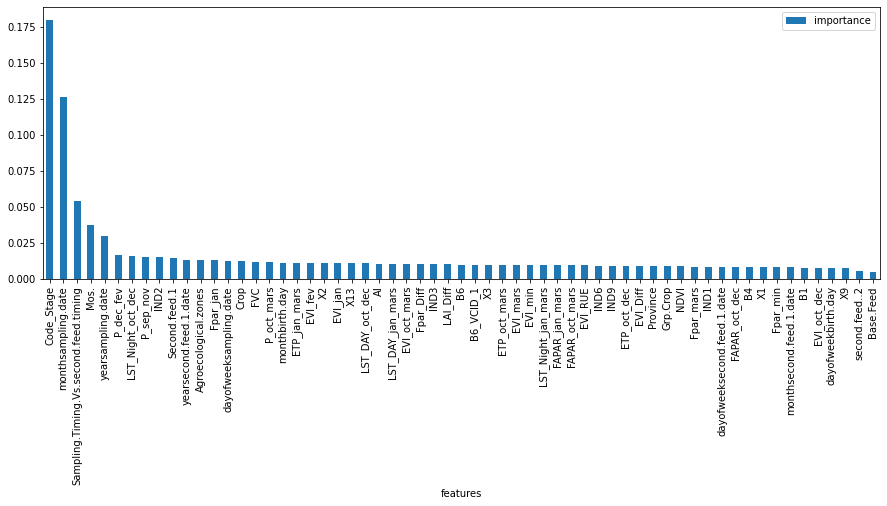

In [ ]:
importance = model.feature_importances_
default_imp=pd.DataFrame(data={'importance':importance,'features':X_train.columns})
default_imp=default_imp.set_index('features')
default_imp=default_imp.sort_values('importance',ascending=False)
default_imp.plot(kind='bar',figsize=(15,5))
plt.show()

Let's drop the feature with less contributions to our prediction.

In [ ]:
x2= x.drop(columns=['second.feed..2','Base.Feed'])
xtest2= xtest.drop(columns=['second.feed..2','Base.Feed'])

* Predictions for submissions :

In [ ]:
model.fit(x2,y)
pred2=model.predict(xtest2)

In [ ]:
submission = pd.DataFrame({'Id':datasub['id'],'Target':pred2})
#Visualize the first 5 rows
submission.head()
submission.to_csv('Xgboost_submission.csv' , index=False)

**Catboost**

First, let's define some initial parameters for our model

In [ ]:
SAMPLE_RATE = 0.4
RANDOM_SEED = 1
EARLY_STOPPING_ROUND = 100

In order to use optuna we had to divide our training test into three parts :
* X_train : Training set
* X_eval : Evaluation of the model
* X_valid : Validation of the model

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

At this point, let's find the parameters that minimize the most the mean squared error using Optuna Search,

But at first, let's define the parameters we are going to tune.

In [ ]:
import optuna 
def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 9, 16)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [4, 6, 8, 16, 20])
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = 10000
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['od_type'] = 'iter'
    param['od_wait'] = 20
    param['random_state'] = RANDOM_SEED
    param['logging_level'] = 'Silent'
    
    regressor = CatBoostRegressor(**param)

    regressor.fit(X_train.copy(), y_train.copy(),
                  eval_set=[(X_eval.copy(), y_eval.copy())],
                  early_stopping_rounds=EARLY_STOPPING_ROUND)
    loss = mean_squared_error(y_valid, regressor.predict(X_valid.copy()))
    return loss

In [ ]:
%%time
study = optuna.create_study(study_name=f'catboost-seed{RANDOM_SEED}')
study.optimize(objective, n_trials=10000, n_jobs=-1, timeout=24000)

After tuning the model the best parameters for our `CatBoostRegressor` are:
* n_estimators=5000
* learning_rate= 0.02
* depth= 9
* l2_leaf_reg= 5.5
* min_child_samples= 16

Now, let's create our final **CatBoost model**

In [ ]:

model = CatBoostRegressor(n_estimators=5000,learning_rate= 0.02, depth= 9, l2_leaf_reg= 5.5, min_child_samples= 16)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_trainpred=model.predict(X_train)

0:	learn: 1.0297112	total: 521ms	remaining: 43m 23s
1:	learn: 1.0234306	total: 685ms	remaining: 28m 31s
2:	learn: 1.0159462	total: 741ms	remaining: 20m 34s
3:	learn: 1.0086582	total: 971ms	remaining: 20m 12s
4:	learn: 1.0025532	total: 1.15s	remaining: 19m 10s
5:	learn: 0.9964832	total: 1.33s	remaining: 18m 31s
6:	learn: 0.9910268	total: 1.5s	remaining: 17m 53s
7:	learn: 0.9856255	total: 1.66s	remaining: 17m 17s
8:	learn: 0.9799747	total: 1.79s	remaining: 16m 34s
9:	learn: 0.9747006	total: 1.96s	remaining: 16m 15s
10:	learn: 0.9688441	total: 2.08s	remaining: 15m 45s
11:	learn: 0.9641506	total: 2.22s	remaining: 15m 24s
12:	learn: 0.9584888	total: 2.34s	remaining: 14m 56s
13:	learn: 0.9535828	total: 2.48s	remaining: 14m 43s
14:	learn: 0.9484147	total: 2.67s	remaining: 14m 46s
15:	learn: 0.9432938	total: 2.84s	remaining: 14m 45s
16:	learn: 0.9388334	total: 3.02s	remaining: 14m 46s
17:	learn: 0.9340156	total: 3.2s	remaining: 14m 44s
18:	learn: 0.9294131	total: 3.38s	remaining: 14m 47s
19:	l

158:	learn: 0.6096490	total: 14.4s	remaining: 7m 19s
159:	learn: 0.6083591	total: 14.5s	remaining: 7m 18s
160:	learn: 0.6071958	total: 14.6s	remaining: 7m 17s
161:	learn: 0.6057759	total: 14.6s	remaining: 7m 16s
162:	learn: 0.6046174	total: 14.7s	remaining: 7m 16s
163:	learn: 0.6032568	total: 14.8s	remaining: 7m 15s
164:	learn: 0.6020912	total: 14.9s	remaining: 7m 15s
165:	learn: 0.6010689	total: 14.9s	remaining: 7m 14s
166:	learn: 0.6000653	total: 15s	remaining: 7m 14s
167:	learn: 0.5990334	total: 15.1s	remaining: 7m 13s
168:	learn: 0.5978270	total: 15.1s	remaining: 7m 12s
169:	learn: 0.5965975	total: 15.2s	remaining: 7m 11s
170:	learn: 0.5957162	total: 15.3s	remaining: 7m 11s
171:	learn: 0.5945014	total: 15.3s	remaining: 7m 10s
172:	learn: 0.5936311	total: 15.4s	remaining: 7m 9s
173:	learn: 0.5925566	total: 15.5s	remaining: 7m 9s
174:	learn: 0.5913624	total: 15.5s	remaining: 7m 8s
175:	learn: 0.5903282	total: 15.6s	remaining: 7m 7s
176:	learn: 0.5890419	total: 15.7s	remaining: 7m 7s


315:	learn: 0.4785577	total: 25.3s	remaining: 6m 14s
316:	learn: 0.4779986	total: 25.4s	remaining: 6m 14s
317:	learn: 0.4775451	total: 25.4s	remaining: 6m 14s
318:	learn: 0.4769569	total: 25.5s	remaining: 6m 14s
319:	learn: 0.4763427	total: 25.6s	remaining: 6m 13s
320:	learn: 0.4759006	total: 25.6s	remaining: 6m 13s
321:	learn: 0.4751179	total: 25.7s	remaining: 6m 13s
322:	learn: 0.4743869	total: 25.8s	remaining: 6m 13s
323:	learn: 0.4734808	total: 25.9s	remaining: 6m 13s
324:	learn: 0.4729897	total: 25.9s	remaining: 6m 12s
325:	learn: 0.4724560	total: 26s	remaining: 6m 12s
326:	learn: 0.4718186	total: 26.1s	remaining: 6m 12s
327:	learn: 0.4712395	total: 26.1s	remaining: 6m 12s
328:	learn: 0.4706228	total: 26.2s	remaining: 6m 12s
329:	learn: 0.4700114	total: 26.3s	remaining: 6m 12s
330:	learn: 0.4691801	total: 26.4s	remaining: 6m 12s
331:	learn: 0.4685226	total: 26.5s	remaining: 6m 11s
332:	learn: 0.4681504	total: 26.5s	remaining: 6m 11s
333:	learn: 0.4675885	total: 26.6s	remaining: 6m

472:	learn: 0.3956598	total: 36s	remaining: 5m 44s
473:	learn: 0.3952307	total: 36.1s	remaining: 5m 44s
474:	learn: 0.3947084	total: 36.1s	remaining: 5m 44s
475:	learn: 0.3941476	total: 36.2s	remaining: 5m 44s
476:	learn: 0.3937983	total: 36.3s	remaining: 5m 43s
477:	learn: 0.3934706	total: 36.3s	remaining: 5m 43s
478:	learn: 0.3930840	total: 36.4s	remaining: 5m 43s
479:	learn: 0.3926565	total: 36.5s	remaining: 5m 43s
480:	learn: 0.3920788	total: 36.6s	remaining: 5m 43s
481:	learn: 0.3915625	total: 36.6s	remaining: 5m 43s
482:	learn: 0.3908350	total: 36.7s	remaining: 5m 43s
483:	learn: 0.3904545	total: 36.8s	remaining: 5m 43s
484:	learn: 0.3904076	total: 36.8s	remaining: 5m 42s
485:	learn: 0.3898251	total: 36.9s	remaining: 5m 42s
486:	learn: 0.3892961	total: 37s	remaining: 5m 42s
487:	learn: 0.3887422	total: 37.1s	remaining: 5m 42s
488:	learn: 0.3882131	total: 37.1s	remaining: 5m 42s
489:	learn: 0.3877657	total: 37.2s	remaining: 5m 42s
490:	learn: 0.3872739	total: 37.3s	remaining: 5m 4

629:	learn: 0.3336190	total: 50.4s	remaining: 5m 49s
630:	learn: 0.3331588	total: 50.5s	remaining: 5m 49s
631:	learn: 0.3327052	total: 50.6s	remaining: 5m 49s
632:	learn: 0.3324781	total: 50.6s	remaining: 5m 49s
633:	learn: 0.3324495	total: 50.7s	remaining: 5m 49s
634:	learn: 0.3321229	total: 50.8s	remaining: 5m 49s
635:	learn: 0.3315807	total: 50.9s	remaining: 5m 49s
636:	learn: 0.3311688	total: 51s	remaining: 5m 49s
637:	learn: 0.3308498	total: 51.1s	remaining: 5m 49s
638:	learn: 0.3305657	total: 51.2s	remaining: 5m 49s
639:	learn: 0.3303033	total: 51.3s	remaining: 5m 49s
640:	learn: 0.3300324	total: 51.4s	remaining: 5m 49s
641:	learn: 0.3296799	total: 51.5s	remaining: 5m 49s
642:	learn: 0.3292111	total: 51.6s	remaining: 5m 49s
643:	learn: 0.3287809	total: 51.8s	remaining: 5m 50s
644:	learn: 0.3287555	total: 51.9s	remaining: 5m 50s
645:	learn: 0.3285163	total: 52s	remaining: 5m 50s
646:	learn: 0.3280027	total: 52.2s	remaining: 5m 51s
647:	learn: 0.3275847	total: 52.3s	remaining: 5m 5

787:	learn: 0.2892944	total: 1m 3s	remaining: 5m 41s
788:	learn: 0.2889995	total: 1m 4s	remaining: 5m 41s
789:	learn: 0.2886969	total: 1m 4s	remaining: 5m 41s
790:	learn: 0.2883924	total: 1m 4s	remaining: 5m 41s
791:	learn: 0.2880590	total: 1m 4s	remaining: 5m 41s
792:	learn: 0.2879086	total: 1m 4s	remaining: 5m 41s
793:	learn: 0.2876753	total: 1m 4s	remaining: 5m 41s
794:	learn: 0.2875563	total: 1m 4s	remaining: 5m 41s
795:	learn: 0.2872567	total: 1m 4s	remaining: 5m 41s
796:	learn: 0.2872334	total: 1m 4s	remaining: 5m 40s
797:	learn: 0.2871693	total: 1m 4s	remaining: 5m 40s
798:	learn: 0.2871512	total: 1m 4s	remaining: 5m 40s
799:	learn: 0.2868331	total: 1m 4s	remaining: 5m 40s
800:	learn: 0.2865266	total: 1m 4s	remaining: 5m 40s
801:	learn: 0.2862061	total: 1m 5s	remaining: 5m 40s
802:	learn: 0.2861695	total: 1m 5s	remaining: 5m 40s
803:	learn: 0.2861499	total: 1m 5s	remaining: 5m 40s
804:	learn: 0.2859751	total: 1m 5s	remaining: 5m 39s
805:	learn: 0.2856547	total: 1m 5s	remaining: 

942:	learn: 0.2549936	total: 1m 17s	remaining: 5m 35s
943:	learn: 0.2547230	total: 1m 17s	remaining: 5m 35s
944:	learn: 0.2546814	total: 1m 18s	remaining: 5m 34s
945:	learn: 0.2544240	total: 1m 18s	remaining: 5m 34s
946:	learn: 0.2543619	total: 1m 18s	remaining: 5m 34s
947:	learn: 0.2541166	total: 1m 18s	remaining: 5m 34s
948:	learn: 0.2537356	total: 1m 18s	remaining: 5m 34s
949:	learn: 0.2534957	total: 1m 18s	remaining: 5m 34s
950:	learn: 0.2531881	total: 1m 18s	remaining: 5m 34s
951:	learn: 0.2529536	total: 1m 18s	remaining: 5m 34s
952:	learn: 0.2526300	total: 1m 18s	remaining: 5m 34s
953:	learn: 0.2524171	total: 1m 18s	remaining: 5m 33s
954:	learn: 0.2523715	total: 1m 18s	remaining: 5m 33s
955:	learn: 0.2521407	total: 1m 18s	remaining: 5m 33s
956:	learn: 0.2517368	total: 1m 18s	remaining: 5m 33s
957:	learn: 0.2513912	total: 1m 19s	remaining: 5m 33s
958:	learn: 0.2511228	total: 1m 19s	remaining: 5m 33s
959:	learn: 0.2510666	total: 1m 19s	remaining: 5m 33s
960:	learn: 0.2507299	total:

1094:	learn: 0.2218851	total: 1m 30s	remaining: 5m 22s
1095:	learn: 0.2216479	total: 1m 30s	remaining: 5m 22s
1096:	learn: 0.2216234	total: 1m 30s	remaining: 5m 22s
1097:	learn: 0.2214399	total: 1m 30s	remaining: 5m 22s
1098:	learn: 0.2212620	total: 1m 30s	remaining: 5m 22s
1099:	learn: 0.2210278	total: 1m 30s	remaining: 5m 22s
1100:	learn: 0.2207895	total: 1m 30s	remaining: 5m 21s
1101:	learn: 0.2204402	total: 1m 31s	remaining: 5m 21s
1102:	learn: 0.2201413	total: 1m 31s	remaining: 5m 21s
1103:	learn: 0.2199338	total: 1m 31s	remaining: 5m 21s
1104:	learn: 0.2196029	total: 1m 31s	remaining: 5m 21s
1105:	learn: 0.2193904	total: 1m 31s	remaining: 5m 21s
1106:	learn: 0.2192555	total: 1m 31s	remaining: 5m 21s
1107:	learn: 0.2192235	total: 1m 31s	remaining: 5m 21s
1108:	learn: 0.2189708	total: 1m 31s	remaining: 5m 21s
1109:	learn: 0.2186319	total: 1m 31s	remaining: 5m 21s
1110:	learn: 0.2183787	total: 1m 31s	remaining: 5m 21s
1111:	learn: 0.2183119	total: 1m 31s	remaining: 5m 21s
1112:	lear

1247:	learn: 0.1925896	total: 1m 42s	remaining: 5m 7s
1248:	learn: 0.1923743	total: 1m 42s	remaining: 5m 7s
1249:	learn: 0.1923622	total: 1m 42s	remaining: 5m 7s
1250:	learn: 0.1920663	total: 1m 42s	remaining: 5m 7s
1251:	learn: 0.1918066	total: 1m 42s	remaining: 5m 7s
1252:	learn: 0.1917179	total: 1m 42s	remaining: 5m 7s
1253:	learn: 0.1915317	total: 1m 42s	remaining: 5m 7s
1254:	learn: 0.1913583	total: 1m 42s	remaining: 5m 7s
1255:	learn: 0.1912372	total: 1m 43s	remaining: 5m 7s
1256:	learn: 0.1909961	total: 1m 43s	remaining: 5m 6s
1257:	learn: 0.1908277	total: 1m 43s	remaining: 5m 6s
1258:	learn: 0.1905868	total: 1m 43s	remaining: 5m 6s
1259:	learn: 0.1903310	total: 1m 43s	remaining: 5m 6s
1260:	learn: 0.1903130	total: 1m 43s	remaining: 5m 6s
1261:	learn: 0.1902485	total: 1m 43s	remaining: 5m 6s
1262:	learn: 0.1900487	total: 1m 43s	remaining: 5m 6s
1263:	learn: 0.1899564	total: 1m 43s	remaining: 5m 6s
1264:	learn: 0.1897977	total: 1m 43s	remaining: 5m 5s
1265:	learn: 0.1895304	total

1400:	learn: 0.1670420	total: 1m 54s	remaining: 4m 53s
1401:	learn: 0.1668442	total: 1m 54s	remaining: 4m 53s
1402:	learn: 0.1668243	total: 1m 54s	remaining: 4m 53s
1403:	learn: 0.1666487	total: 1m 54s	remaining: 4m 53s
1404:	learn: 0.1666416	total: 1m 54s	remaining: 4m 53s
1405:	learn: 0.1664346	total: 1m 54s	remaining: 4m 53s
1406:	learn: 0.1664014	total: 1m 54s	remaining: 4m 52s
1407:	learn: 0.1662440	total: 1m 54s	remaining: 4m 52s
1408:	learn: 0.1661694	total: 1m 54s	remaining: 4m 52s
1409:	learn: 0.1660118	total: 1m 54s	remaining: 4m 52s
1410:	learn: 0.1659973	total: 1m 54s	remaining: 4m 52s
1411:	learn: 0.1657866	total: 1m 55s	remaining: 4m 52s
1412:	learn: 0.1656262	total: 1m 55s	remaining: 4m 52s
1413:	learn: 0.1655010	total: 1m 55s	remaining: 4m 52s
1414:	learn: 0.1652667	total: 1m 55s	remaining: 4m 52s
1415:	learn: 0.1650784	total: 1m 55s	remaining: 4m 51s
1416:	learn: 0.1650434	total: 1m 55s	remaining: 4m 51s
1417:	learn: 0.1649350	total: 1m 55s	remaining: 4m 51s
1418:	lear

1552:	learn: 0.1462973	total: 2m 7s	remaining: 4m 42s
1553:	learn: 0.1461556	total: 2m 7s	remaining: 4m 42s
1554:	learn: 0.1459845	total: 2m 7s	remaining: 4m 42s
1555:	learn: 0.1459142	total: 2m 7s	remaining: 4m 42s
1556:	learn: 0.1458526	total: 2m 7s	remaining: 4m 42s
1557:	learn: 0.1458372	total: 2m 7s	remaining: 4m 42s
1558:	learn: 0.1456378	total: 2m 7s	remaining: 4m 42s
1559:	learn: 0.1454949	total: 2m 8s	remaining: 4m 42s
1560:	learn: 0.1452859	total: 2m 8s	remaining: 4m 42s
1561:	learn: 0.1451351	total: 2m 8s	remaining: 4m 42s
1562:	learn: 0.1450987	total: 2m 8s	remaining: 4m 42s
1563:	learn: 0.1449911	total: 2m 8s	remaining: 4m 42s
1564:	learn: 0.1448242	total: 2m 8s	remaining: 4m 42s
1565:	learn: 0.1446605	total: 2m 8s	remaining: 4m 42s
1566:	learn: 0.1444692	total: 2m 8s	remaining: 4m 41s
1567:	learn: 0.1443929	total: 2m 8s	remaining: 4m 41s
1568:	learn: 0.1442690	total: 2m 8s	remaining: 4m 41s
1569:	learn: 0.1441196	total: 2m 8s	remaining: 4m 41s
1570:	learn: 0.1439552	total

1702:	learn: 0.1281257	total: 2m 18s	remaining: 4m 28s
1703:	learn: 0.1280303	total: 2m 18s	remaining: 4m 28s
1704:	learn: 0.1280001	total: 2m 19s	remaining: 4m 28s
1705:	learn: 0.1278319	total: 2m 19s	remaining: 4m 28s
1706:	learn: 0.1277308	total: 2m 19s	remaining: 4m 28s
1707:	learn: 0.1276598	total: 2m 19s	remaining: 4m 28s
1708:	learn: 0.1275978	total: 2m 19s	remaining: 4m 28s
1709:	learn: 0.1274863	total: 2m 19s	remaining: 4m 28s
1710:	learn: 0.1273654	total: 2m 19s	remaining: 4m 28s
1711:	learn: 0.1271960	total: 2m 19s	remaining: 4m 27s
1712:	learn: 0.1270193	total: 2m 19s	remaining: 4m 27s
1713:	learn: 0.1269786	total: 2m 19s	remaining: 4m 27s
1714:	learn: 0.1268681	total: 2m 19s	remaining: 4m 27s
1715:	learn: 0.1267833	total: 2m 19s	remaining: 4m 27s
1716:	learn: 0.1266606	total: 2m 19s	remaining: 4m 27s
1717:	learn: 0.1266454	total: 2m 19s	remaining: 4m 27s
1718:	learn: 0.1266171	total: 2m 19s	remaining: 4m 27s
1719:	learn: 0.1265326	total: 2m 20s	remaining: 4m 27s
1720:	lear

1851:	learn: 0.1147156	total: 2m 30s	remaining: 4m 16s
1852:	learn: 0.1145460	total: 2m 31s	remaining: 4m 16s
1853:	learn: 0.1144410	total: 2m 31s	remaining: 4m 16s
1854:	learn: 0.1143390	total: 2m 31s	remaining: 4m 16s
1855:	learn: 0.1142607	total: 2m 31s	remaining: 4m 16s
1856:	learn: 0.1142479	total: 2m 31s	remaining: 4m 16s
1857:	learn: 0.1142020	total: 2m 31s	remaining: 4m 16s
1858:	learn: 0.1140810	total: 2m 31s	remaining: 4m 16s
1859:	learn: 0.1140747	total: 2m 31s	remaining: 4m 16s
1860:	learn: 0.1139665	total: 2m 31s	remaining: 4m 15s
1861:	learn: 0.1138538	total: 2m 31s	remaining: 4m 15s
1862:	learn: 0.1137020	total: 2m 31s	remaining: 4m 15s
1863:	learn: 0.1136722	total: 2m 31s	remaining: 4m 15s
1864:	learn: 0.1135665	total: 2m 32s	remaining: 4m 15s
1865:	learn: 0.1135139	total: 2m 32s	remaining: 4m 15s
1866:	learn: 0.1134052	total: 2m 32s	remaining: 4m 15s
1867:	learn: 0.1133169	total: 2m 32s	remaining: 4m 15s
1868:	learn: 0.1132152	total: 2m 32s	remaining: 4m 15s
1869:	lear

2005:	learn: 0.1015599	total: 2m 41s	remaining: 4m
2006:	learn: 0.1014468	total: 2m 41s	remaining: 4m
2007:	learn: 0.1014072	total: 2m 41s	remaining: 4m
2008:	learn: 0.1013205	total: 2m 41s	remaining: 4m
2009:	learn: 0.1012045	total: 2m 41s	remaining: 4m
2010:	learn: 0.1011025	total: 2m 41s	remaining: 4m
2011:	learn: 0.1010827	total: 2m 41s	remaining: 4m
2012:	learn: 0.1010277	total: 2m 41s	remaining: 4m
2013:	learn: 0.1009061	total: 2m 41s	remaining: 4m
2014:	learn: 0.1008255	total: 2m 42s	remaining: 3m 59s
2015:	learn: 0.1007998	total: 2m 42s	remaining: 3m 59s
2016:	learn: 0.1007942	total: 2m 42s	remaining: 3m 59s
2017:	learn: 0.1007636	total: 2m 42s	remaining: 3m 59s
2018:	learn: 0.1007542	total: 2m 42s	remaining: 3m 59s
2019:	learn: 0.1007467	total: 2m 42s	remaining: 3m 59s
2020:	learn: 0.1006309	total: 2m 42s	remaining: 3m 59s
2021:	learn: 0.1005275	total: 2m 42s	remaining: 3m 59s
2022:	learn: 0.1004025	total: 2m 42s	remaining: 3m 59s
2023:	learn: 0.1002288	total: 2m 42s	remaining

2156:	learn: 0.0901786	total: 2m 54s	remaining: 3m 49s
2157:	learn: 0.0901094	total: 2m 54s	remaining: 3m 49s
2158:	learn: 0.0901031	total: 2m 54s	remaining: 3m 49s
2159:	learn: 0.0900282	total: 2m 54s	remaining: 3m 49s
2160:	learn: 0.0899765	total: 2m 54s	remaining: 3m 49s
2161:	learn: 0.0898617	total: 2m 54s	remaining: 3m 49s
2162:	learn: 0.0897896	total: 2m 54s	remaining: 3m 49s
2163:	learn: 0.0897198	total: 2m 54s	remaining: 3m 49s
2164:	learn: 0.0896327	total: 2m 54s	remaining: 3m 49s
2165:	learn: 0.0895323	total: 2m 54s	remaining: 3m 48s
2166:	learn: 0.0894337	total: 2m 55s	remaining: 3m 48s
2167:	learn: 0.0893761	total: 2m 55s	remaining: 3m 48s
2168:	learn: 0.0893150	total: 2m 55s	remaining: 3m 48s
2169:	learn: 0.0892298	total: 2m 55s	remaining: 3m 48s
2170:	learn: 0.0891310	total: 2m 55s	remaining: 3m 48s
2171:	learn: 0.0890523	total: 2m 55s	remaining: 3m 48s
2172:	learn: 0.0889766	total: 2m 55s	remaining: 3m 48s
2173:	learn: 0.0889487	total: 2m 55s	remaining: 3m 48s
2174:	lear

2309:	learn: 0.0803409	total: 3m 7s	remaining: 3m 37s
2310:	learn: 0.0802571	total: 3m 7s	remaining: 3m 37s
2311:	learn: 0.0802539	total: 3m 7s	remaining: 3m 37s
2312:	learn: 0.0802148	total: 3m 7s	remaining: 3m 37s
2313:	learn: 0.0800982	total: 3m 7s	remaining: 3m 37s
2314:	learn: 0.0800338	total: 3m 7s	remaining: 3m 37s
2315:	learn: 0.0799649	total: 3m 7s	remaining: 3m 37s
2316:	learn: 0.0798631	total: 3m 7s	remaining: 3m 37s
2317:	learn: 0.0797839	total: 3m 7s	remaining: 3m 37s
2318:	learn: 0.0797669	total: 3m 7s	remaining: 3m 37s
2319:	learn: 0.0796771	total: 3m 8s	remaining: 3m 37s
2320:	learn: 0.0796027	total: 3m 8s	remaining: 3m 37s
2321:	learn: 0.0796004	total: 3m 8s	remaining: 3m 37s
2322:	learn: 0.0795197	total: 3m 8s	remaining: 3m 36s
2323:	learn: 0.0794190	total: 3m 8s	remaining: 3m 36s
2324:	learn: 0.0794169	total: 3m 8s	remaining: 3m 36s
2325:	learn: 0.0793922	total: 3m 8s	remaining: 3m 36s
2326:	learn: 0.0793212	total: 3m 8s	remaining: 3m 36s
2327:	learn: 0.0792800	total

2461:	learn: 0.0713241	total: 3m 18s	remaining: 3m 24s
2462:	learn: 0.0712372	total: 3m 18s	remaining: 3m 24s
2463:	learn: 0.0711560	total: 3m 18s	remaining: 3m 24s
2464:	learn: 0.0710959	total: 3m 19s	remaining: 3m 24s
2465:	learn: 0.0710438	total: 3m 19s	remaining: 3m 24s
2466:	learn: 0.0709669	total: 3m 19s	remaining: 3m 24s
2467:	learn: 0.0709541	total: 3m 19s	remaining: 3m 24s
2468:	learn: 0.0708813	total: 3m 19s	remaining: 3m 24s
2469:	learn: 0.0708108	total: 3m 19s	remaining: 3m 24s
2470:	learn: 0.0707266	total: 3m 19s	remaining: 3m 24s
2471:	learn: 0.0706239	total: 3m 19s	remaining: 3m 24s
2472:	learn: 0.0705249	total: 3m 19s	remaining: 3m 24s
2473:	learn: 0.0704701	total: 3m 19s	remaining: 3m 24s
2474:	learn: 0.0704058	total: 3m 20s	remaining: 3m 24s
2475:	learn: 0.0703894	total: 3m 20s	remaining: 3m 23s
2476:	learn: 0.0703062	total: 3m 20s	remaining: 3m 23s
2477:	learn: 0.0702497	total: 3m 20s	remaining: 3m 24s
2478:	learn: 0.0701410	total: 3m 20s	remaining: 3m 24s
2479:	lear

2611:	learn: 0.0629634	total: 3m 35s	remaining: 3m 17s
2612:	learn: 0.0629158	total: 3m 35s	remaining: 3m 17s
2613:	learn: 0.0628604	total: 3m 35s	remaining: 3m 16s
2614:	learn: 0.0627840	total: 3m 35s	remaining: 3m 16s
2615:	learn: 0.0627478	total: 3m 36s	remaining: 3m 16s
2616:	learn: 0.0627468	total: 3m 36s	remaining: 3m 16s
2617:	learn: 0.0626991	total: 3m 36s	remaining: 3m 16s
2618:	learn: 0.0626467	total: 3m 36s	remaining: 3m 16s
2619:	learn: 0.0626118	total: 3m 36s	remaining: 3m 16s
2620:	learn: 0.0625494	total: 3m 36s	remaining: 3m 16s
2621:	learn: 0.0624988	total: 3m 36s	remaining: 3m 16s
2622:	learn: 0.0624514	total: 3m 36s	remaining: 3m 16s
2623:	learn: 0.0623935	total: 3m 36s	remaining: 3m 16s
2624:	learn: 0.0623297	total: 3m 36s	remaining: 3m 16s
2625:	learn: 0.0622723	total: 3m 36s	remaining: 3m 15s
2626:	learn: 0.0622660	total: 3m 36s	remaining: 3m 15s
2627:	learn: 0.0622062	total: 3m 36s	remaining: 3m 15s
2628:	learn: 0.0621539	total: 3m 37s	remaining: 3m 15s
2629:	lear

2762:	learn: 0.0554228	total: 3m 50s	remaining: 3m 6s
2763:	learn: 0.0553756	total: 3m 50s	remaining: 3m 6s
2764:	learn: 0.0553498	total: 3m 51s	remaining: 3m 6s
2765:	learn: 0.0552716	total: 3m 51s	remaining: 3m 6s
2766:	learn: 0.0552267	total: 3m 51s	remaining: 3m 6s
2767:	learn: 0.0551436	total: 3m 51s	remaining: 3m 6s
2768:	learn: 0.0551009	total: 3m 51s	remaining: 3m 6s
2769:	learn: 0.0550452	total: 3m 51s	remaining: 3m 6s
2770:	learn: 0.0549797	total: 3m 51s	remaining: 3m 6s
2771:	learn: 0.0549361	total: 3m 51s	remaining: 3m 6s
2772:	learn: 0.0549029	total: 3m 51s	remaining: 3m 5s
2773:	learn: 0.0548551	total: 3m 51s	remaining: 3m 5s
2774:	learn: 0.0548435	total: 3m 51s	remaining: 3m 5s
2775:	learn: 0.0547797	total: 3m 51s	remaining: 3m 5s
2776:	learn: 0.0547390	total: 3m 51s	remaining: 3m 5s
2777:	learn: 0.0546576	total: 3m 51s	remaining: 3m 5s
2778:	learn: 0.0545879	total: 3m 51s	remaining: 3m 5s
2779:	learn: 0.0545309	total: 3m 52s	remaining: 3m 5s
2780:	learn: 0.0545111	total

2916:	learn: 0.0488322	total: 4m 2s	remaining: 2m 53s
2917:	learn: 0.0487691	total: 4m 2s	remaining: 2m 52s
2918:	learn: 0.0487447	total: 4m 2s	remaining: 2m 52s
2919:	learn: 0.0486896	total: 4m 2s	remaining: 2m 52s
2920:	learn: 0.0486803	total: 4m 2s	remaining: 2m 52s
2921:	learn: 0.0486247	total: 4m 2s	remaining: 2m 52s
2922:	learn: 0.0486050	total: 4m 2s	remaining: 2m 52s
2923:	learn: 0.0485244	total: 4m 2s	remaining: 2m 52s
2924:	learn: 0.0484784	total: 4m 2s	remaining: 2m 52s
2925:	learn: 0.0484355	total: 4m 2s	remaining: 2m 52s
2926:	learn: 0.0484256	total: 4m 2s	remaining: 2m 52s
2927:	learn: 0.0484015	total: 4m 3s	remaining: 2m 51s
2928:	learn: 0.0483625	total: 4m 3s	remaining: 2m 51s
2929:	learn: 0.0483588	total: 4m 3s	remaining: 2m 51s
2930:	learn: 0.0483004	total: 4m 3s	remaining: 2m 51s
2931:	learn: 0.0482512	total: 4m 3s	remaining: 2m 51s
2932:	learn: 0.0482506	total: 4m 3s	remaining: 2m 51s
2933:	learn: 0.0482414	total: 4m 3s	remaining: 2m 51s
2934:	learn: 0.0482018	total

3067:	learn: 0.0428845	total: 4m 14s	remaining: 2m 40s
3068:	learn: 0.0428557	total: 4m 14s	remaining: 2m 40s
3069:	learn: 0.0427849	total: 4m 14s	remaining: 2m 40s
3070:	learn: 0.0427781	total: 4m 14s	remaining: 2m 39s
3071:	learn: 0.0427472	total: 4m 14s	remaining: 2m 39s
3072:	learn: 0.0427301	total: 4m 14s	remaining: 2m 39s
3073:	learn: 0.0426802	total: 4m 14s	remaining: 2m 39s
3074:	learn: 0.0426370	total: 4m 15s	remaining: 2m 39s
3075:	learn: 0.0426033	total: 4m 15s	remaining: 2m 39s
3076:	learn: 0.0425647	total: 4m 15s	remaining: 2m 39s
3077:	learn: 0.0425494	total: 4m 15s	remaining: 2m 39s
3078:	learn: 0.0424992	total: 4m 15s	remaining: 2m 39s
3079:	learn: 0.0424843	total: 4m 15s	remaining: 2m 39s
3080:	learn: 0.0424411	total: 4m 15s	remaining: 2m 39s
3081:	learn: 0.0424305	total: 4m 15s	remaining: 2m 39s
3082:	learn: 0.0423994	total: 4m 15s	remaining: 2m 39s
3083:	learn: 0.0423470	total: 4m 15s	remaining: 2m 38s
3084:	learn: 0.0423108	total: 4m 15s	remaining: 2m 38s
3085:	lear

3218:	learn: 0.0373282	total: 4m 29s	remaining: 2m 29s
3219:	learn: 0.0372910	total: 4m 30s	remaining: 2m 29s
3220:	learn: 0.0372474	total: 4m 30s	remaining: 2m 29s
3221:	learn: 0.0372185	total: 4m 30s	remaining: 2m 29s
3222:	learn: 0.0371920	total: 4m 30s	remaining: 2m 29s
3223:	learn: 0.0371656	total: 4m 30s	remaining: 2m 28s
3224:	learn: 0.0371540	total: 4m 30s	remaining: 2m 28s
3225:	learn: 0.0370995	total: 4m 30s	remaining: 2m 28s
3226:	learn: 0.0370829	total: 4m 30s	remaining: 2m 28s
3227:	learn: 0.0370548	total: 4m 30s	remaining: 2m 28s
3228:	learn: 0.0370170	total: 4m 30s	remaining: 2m 28s
3229:	learn: 0.0369650	total: 4m 30s	remaining: 2m 28s
3230:	learn: 0.0369358	total: 4m 30s	remaining: 2m 28s
3231:	learn: 0.0368953	total: 4m 31s	remaining: 2m 28s
3232:	learn: 0.0368388	total: 4m 31s	remaining: 2m 28s
3233:	learn: 0.0368151	total: 4m 31s	remaining: 2m 28s
3234:	learn: 0.0367680	total: 4m 31s	remaining: 2m 28s
3235:	learn: 0.0367486	total: 4m 31s	remaining: 2m 27s
3236:	lear

3369:	learn: 0.0327850	total: 4m 42s	remaining: 2m 16s
3370:	learn: 0.0327540	total: 4m 42s	remaining: 2m 16s
3371:	learn: 0.0327145	total: 4m 42s	remaining: 2m 16s
3372:	learn: 0.0326824	total: 4m 42s	remaining: 2m 16s
3373:	learn: 0.0326522	total: 4m 42s	remaining: 2m 16s
3374:	learn: 0.0326184	total: 4m 42s	remaining: 2m 16s
3375:	learn: 0.0326130	total: 4m 42s	remaining: 2m 15s
3376:	learn: 0.0326031	total: 4m 42s	remaining: 2m 15s
3377:	learn: 0.0325712	total: 4m 42s	remaining: 2m 15s
3378:	learn: 0.0325417	total: 4m 42s	remaining: 2m 15s
3379:	learn: 0.0325172	total: 4m 42s	remaining: 2m 15s
3380:	learn: 0.0324859	total: 4m 42s	remaining: 2m 15s
3381:	learn: 0.0324589	total: 4m 43s	remaining: 2m 15s
3382:	learn: 0.0324304	total: 4m 43s	remaining: 2m 15s
3383:	learn: 0.0324046	total: 4m 43s	remaining: 2m 15s
3384:	learn: 0.0323603	total: 4m 43s	remaining: 2m 15s
3385:	learn: 0.0323178	total: 4m 43s	remaining: 2m 15s
3386:	learn: 0.0322853	total: 4m 43s	remaining: 2m 14s
3387:	lear

In [ ]:

print("MSE on testing set :", MSE(Y_test,Y_pred))
print("MSE on training set :", MSE(Y_train,Y_trainpred))

rmse = sqrt(MSE(Y_test, Y_pred))
print("RMSE on testing set:",rmse)


Let's compare the predicted data and the actual one

In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(15)
df1

Now that we predicted our data, we can take a look at the feature importance of our variables and see if we can benefit from it.

In [ ]:
importance = model.feature_importances_
default_imp=pd.DataFrame(data={'importance':importance,'features':X_train.columns})
default_imp=default_imp.set_index('features')
default_imp=default_imp.sort_values('importance',ascending=False)
default_imp.plot(kind='bar',figsize=(15,5))
plt.show()

Let's drop the feature with less contributions to our prediction.

In [ ]:
x2= x.drop(columns=['second.feed..2','Base.Feed'])
xtest2= xtest.drop(columns=['second.feed..2','Base.Feed'])

* Predictions for submissions :


In [ ]:
model.fit(x2,y)
pred2=model.predict(xtest2)

In [ ]:
submission = pd.DataFrame({'Id':datasub['id'],'Target':pred2})
#Visualize the first 5 rows
submission.head()
submission.to_csv('Catboost_submission.csv' , index=False)